Martín Amado - 19020
Juan Pablo Pineda - 19087
Laura Tamath - 19365

referencia para análisis de datos: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#4.-Missing-data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.diagnostic as diag
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import sklearn.preprocessing
## import pyclustertend 
from sklearn.cluster import Birch
import matplotlib.cm as cm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

## Análisis  exploratorio
Explicación de hallazgos y conclusiones -Laura

In [11]:
data = pd.read_csv('./train.csv', encoding = "latin1")
quant= list(pd.read_csv('./cuantitativas.txt', encoding = "latin1"))
quali= list(pd.read_csv('./cualitativas.txt', encoding = "latin1"))


In [12]:
#Variables cuantitativas
data[quant].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


LotFrontage: Kurtosis: 17.375300497599614 Asimetría: 2.160865994705543 



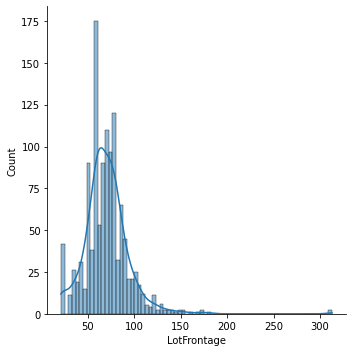

In [42]:
for var in quant:
    data = data[var].dropna(how='all', axis=0)
  
    sns.displot(data, kde=True)

    print( var + ':' + ' Kurtosis:', stats.kurtosis(data), 'Asimetría:', stats.skew(data), '\n')

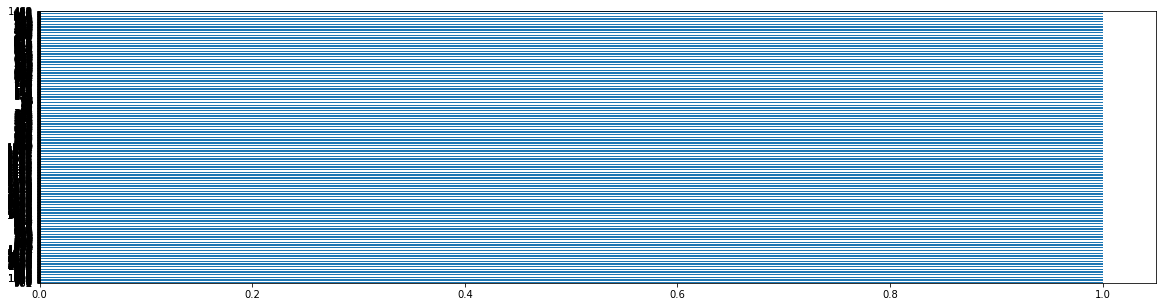

In [49]:
#Variables cualitativas
for var in quali:
  plt.figure(figsize=(20,5))
  data[var].value_counts().plot(kind='barh')
  plt.show()

In [53]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

Kurtosis: 6.536282
Asimetría: 1.882876


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [54]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Kolmogorov-Smirnov:
p=0.000000

Lilliefors:
ks=0.123685
p=0.001000


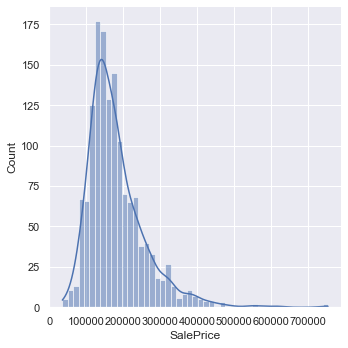

In [67]:
sns.displot(data['SalePrice'], kde=True)

<AxesSubplot:xlabel='SalePrice'>

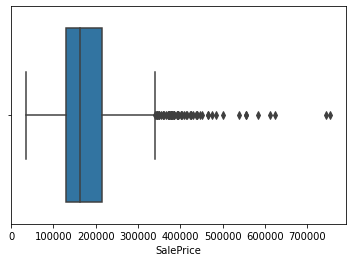

In [57]:
sns.boxplot(x=data["SalePrice"])

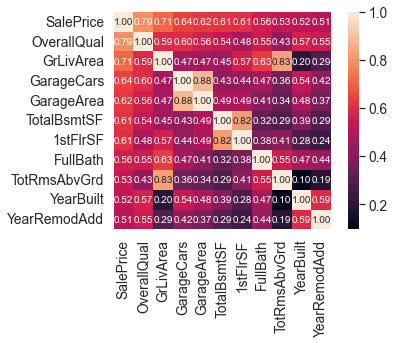

In [59]:
k = 11
corrmat = data.corr()
columns = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

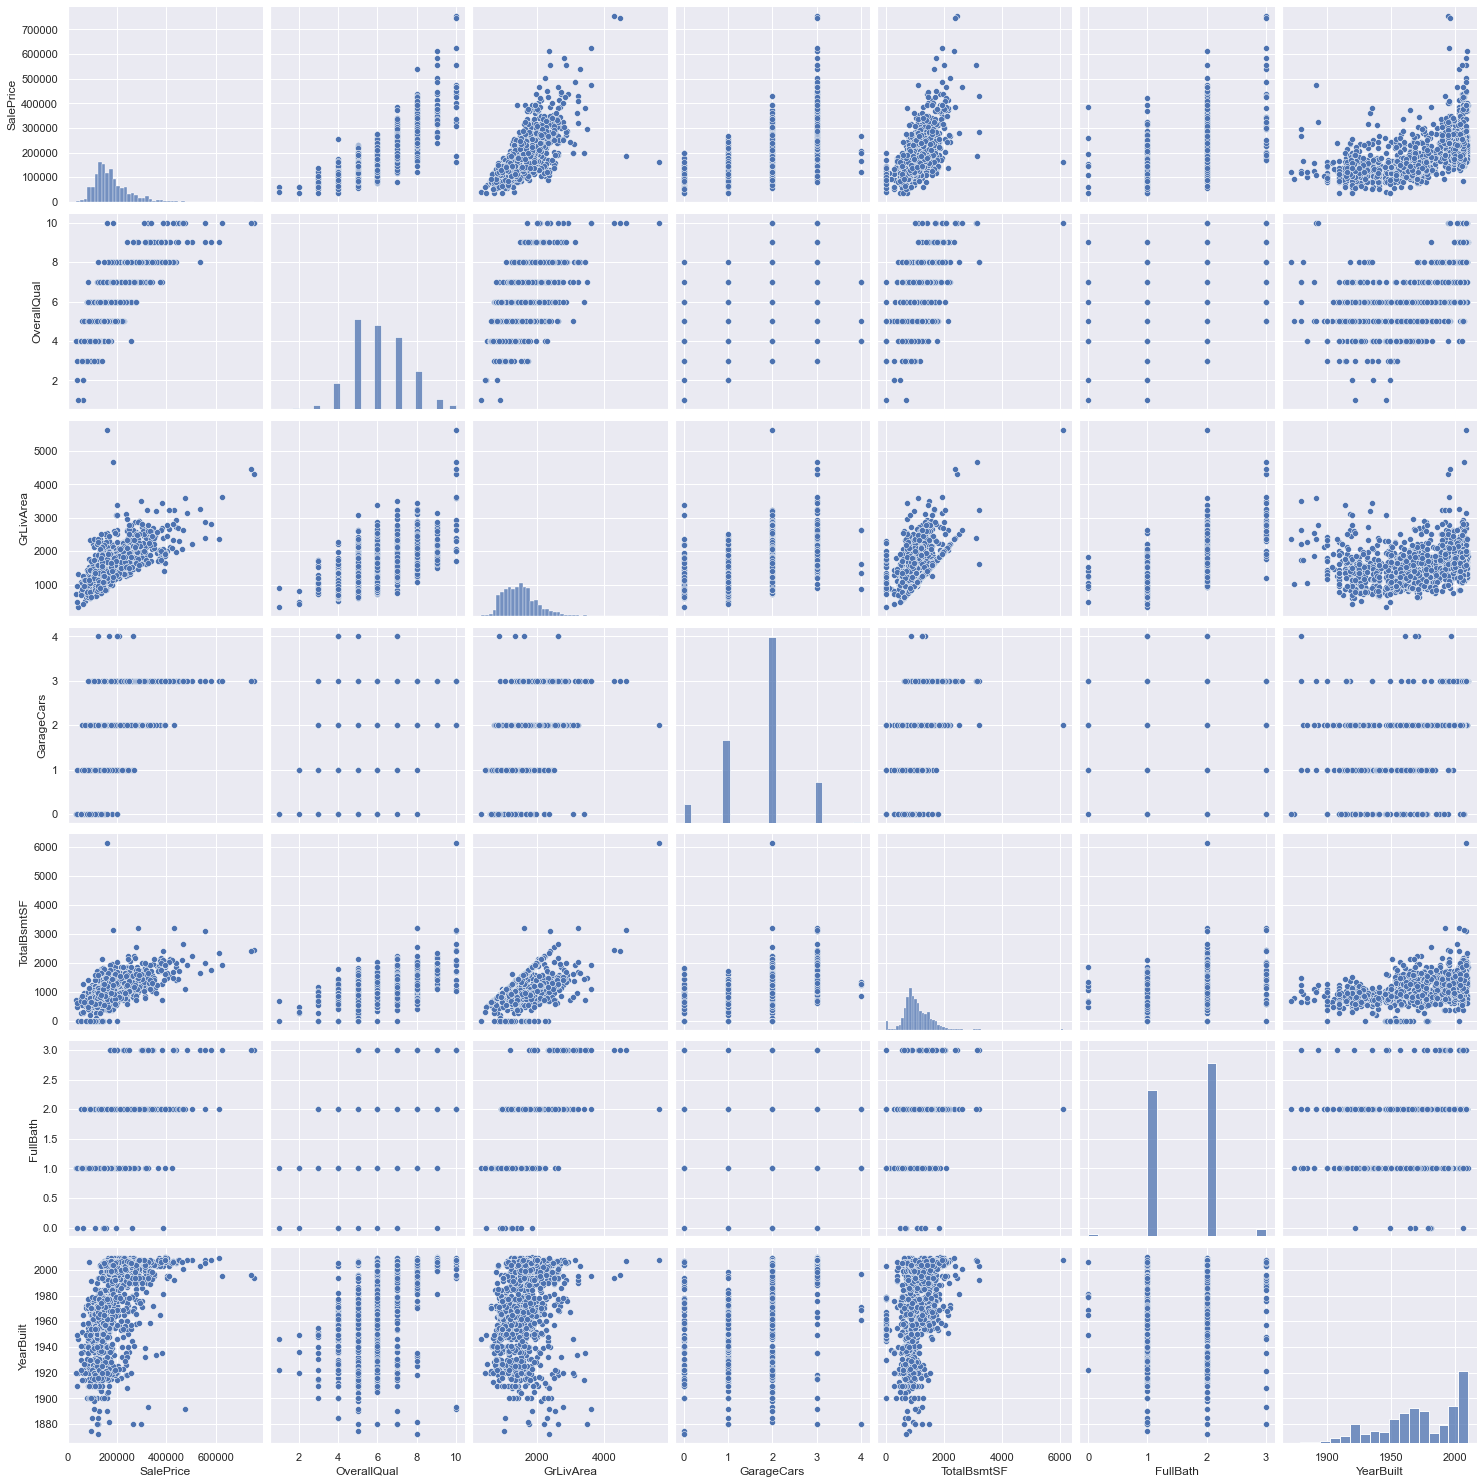

In [60]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[columns], height= 3)
plt.show()

## Análisis de grupos
Explicación de las características - Laura

In [17]:
#cualitativa
groups = ['OverallQual', 'YearBuilt']
_lista = list(np.array(data[[ groups[0]]]))
group = list(data.groupby(by=groups[0]).groups.keys())
tags = []
number = {}
tagNo = {}

for i in range(len(group)): 
  number[group[i]] = i
  tagNo[i] = group[i]

for i in range(len(_lista)): tags.append(number[_lista[i][0]])

# Cuantitativa
# columnsToUse = ["SalePrice", "GarageCars", "FullBath", "TotalBsmtSF", "GrLivArea"]
d_cluster = data[quant].fillna(0)
X_scale = sklearn.preprocessing.scale(d_cluster)

## Variable respuesta
permite clasificar las casas  en Económicas, Intermedias o Caras. -Pineda

## Entrenamiento y prueba
Descripción del criterio que se usó para crear los conjuntos: número de filas de cada uno, estratificado o no, balanceado o no, etc. -Pineda

# Árbol de clasificación
Muestre el modelo gráficamente. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. - Martin

## Árbol de regresión
para predecir el precio de las viviendas utilizando el conjunto 
de entrenamiento. Muestre el modelo gráficamente. 
El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. -Laura

## Determinar la eficiencia del algoritmo
para clasificar y predecir, en dependencia de las características de la variable respuesta.  -Martin

## Ánalisis de eficiencia
Usando una matriz de confusión para el árbol de clasificación. -Martin

## Análisis del desempeño del árbol de regresión 
-pineda

## Utilice random  forest
Explique  sus resultados comparando ambos algoritmos.  -Martin